ASSIGNMENT 2: GROCERY SALES By Emily Grant
    

In looking for patterns in sales, results I thought it would be good to understand the strongest markets with the most successful products.   I achieved this through creating a master csv spreadsheet bringing together information about the products sold and the regions where the most sales are occurring. 


I used the data set: Grocery Sales.  

Please see the notebook titled: Assignment 2 Sale, Assignment 2 customers, Assignment 2 cities2.  These are also the csv tables that I imported and joined into other csv tables in my assignment.

I also cleaned the data for all of the remaining data tables in the Grocery Sales Data Set. See notebooks titled: Assignment 2 Items and Assignment 2 Sales_Rep

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
sales = pd.read_csv('sales.csv', sep=',')

In [6]:
customers = pd.read_csv('customers2.csv', sep=',',encoding = "ISO-8859-1")

In [7]:
sales.head()

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,115785,1/12/2012,-159.17,-3.0,180
3,3431,-43.12,10012226,1/12/2012,-118.3703,1/12/2012,318960,Tip Top Lox,10215,-70.52,115785,1/12/2012,-113.64,-1.0,180
4,3432,-37.98,10012226,1/12/2012,-102.3319,1/12/2012,318960,Just Right Beef Soup,10965,-60.26,115785,1/12/2012,-98.24,-1.0,180


In [8]:
sales.shape

(96466, 15)

In [9]:
customers.head()

,Customer,Customer Number,City Code
0,A Superior System,10000453,1
1,A&B,10000456,76
2,A&G,10000457,2
3,A&R Partners,10000458,43
4,A1 Datacom Supply,10000461,77


In [10]:
customers.shape

(684, 3)

QUESTIONS TO EXPLORE:

1. How many sales are in each city?

2. What are the most popular (top 5)cities?

3. What are the most popular (top 5) products that sell in these cities?

4. What are the trends of sales throughout the year?

Propose a hypothesis around patterns and correlations revealed during the analysis.

In [11]:
# JOINING AND EDITING DATA IN CSV TABLES TO PROVIDE A CSV TABLE THAT IS COMPREHENSIVE AND EASY TO INTERPET
# Join csv tables sales and customers: create a new csv table with the columns I require. 
# Right join?

In [12]:
customer_sales_master = pd.merge(left=sales, right=customers, how="right", on="Customer Number")

In [13]:
customer_sales_master.head()
# It's a bit on the large side.
# I want to create a csv table that inclues information about dates, products, customers and cities. 

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number,Customer,City Code
0,3456.0,3.51,10000453,1/12/2012,5.9111,1/12/2012,319153.0,Blue Label Chicken Soup,10019.0,2.16,116657.0,1/12/2012,5.67,1.0,125.0,A Superior System,1
1,4804.0,147.27,10000453,1/18/2012,182.4093,1/18/2012,319391.0,Better Canned Tuna in Water,10341.0,27.84,116664.0,1/18/2012,175.11,1.0,125.0,A Superior System,1
2,5379.0,5.75,10000453,1/21/2012,17.7832,1/21/2012,319710.0,Golden Frozen Broccoli,10106.0,11.32,116532.0,1/21/2012,17.07,1.0,125.0,A Superior System,1
3,5424.0,41.56,10000453,1/21/2012,68.2464,1/21/2012,319702.0,High Top Golden Delcious Apples,10197.0,23.96,116305.0,1/21/2012,65.52,6.0,125.0,A Superior System,1
4,5459.0,110.45,10000453,1/21/2012,164.7821,1/21/2012,319723.0,Gorilla Low Fat String Cheese,10671.0,47.74,116963.0,1/21/2012,158.19,1.0,125.0,A Superior System,1


In [14]:
#I wanted to add the city code column, but will now remove some of the columns that I don't need.
customer_sales_master = customer_sales_master.drop(['%KEY','Invoice Date','Invoice Number', 'Order Number', 'Promised Delivery Date', 'Sales Rep Number'], axis=1) 
               

In [15]:
customer_sales_master.head()
# This is looking much neater

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code
0,3.51,10000453,1/12/2012,5.9111,Blue Label Chicken Soup,10019.0,2.16,5.67,1.0,A Superior System,1
1,147.27,10000453,1/18/2012,182.4093,Better Canned Tuna in Water,10341.0,27.84,175.11,1.0,A Superior System,1
2,5.75,10000453,1/21/2012,17.7832,Golden Frozen Broccoli,10106.0,11.32,17.07,1.0,A Superior System,1
3,41.56,10000453,1/21/2012,68.2464,High Top Golden Delcious Apples,10197.0,23.96,65.52,6.0,A Superior System,1
4,110.45,10000453,1/21/2012,164.7821,Gorilla Low Fat String Cheese,10671.0,47.74,158.19,1.0,A Superior System,1


In [16]:
customer_sales_master.shape
# Same amount of rows, but 11 columns is much easier to work with

(97268, 11)

In [17]:
cities = pd.read_csv('cities2.csv', sep=',',encoding = "ISO-8859-1")
# I wanted just to add the city from this table.   I wasn't exactly sure how to add just a single column, so I 
# did a "right" add, then deleted the columns that I didn't need.

In [18]:
cities.head()

,City,City Code,Region,Latitude,Longitude,Desc
0,New York,1,USA,40.730599,-73.986581,"""New York City, NY, US"""
1,Los Angeles,2,USA,34.053678,-118.242702,"""Los Angeles, Los Angeles County, CA, US"""
2,Chicago,3,USA,41.875555,-87.624421,"""Chicago, Cook County, IL, US"""
3,Houston,4,USA,29.981501,-95.538360,"""Houston, Harris County, TX, US"""
4,Philadelphia,5,USA,39.952335,-75.163789,"""Philadelphia, Philadelphia County, PA, US"""


In [19]:
customer_sales_master = pd.merge(left=customer_sales_master, right=cities, how="right", on="City Code")

In [20]:
customer_sales_master.to_csv('customer_sales_master.csv', index=False)

In [21]:
customer_sales_master.head(1)
# Joined, but again too much data for the posed questions, so I am deleting the rows that aren't required.

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,Latitude,Longitude,Desc
0,3.51,10000453.0,1/12/2012,5.9111,Blue Label Chicken Soup,10019.0,2.16,5.67,1.0,A Superior System,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US"""


In [22]:
customer_sales_master = customer_sales_master.drop(['Latitude','Longitude', 'Desc' ], axis=1)

In [23]:
customer_sales_master.head()
# Finally created my master csv with the specific data that I wanted!

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region
0,3.51,10000453.0,1/12/2012,5.9111,Blue Label Chicken Soup,10019.0,2.16,5.67,1.0,A Superior System,1,New York,USA
1,147.27,10000453.0,1/18/2012,182.4093,Better Canned Tuna in Water,10341.0,27.84,175.11,1.0,A Superior System,1,New York,USA
2,5.75,10000453.0,1/21/2012,17.7832,Golden Frozen Broccoli,10106.0,11.32,17.07,1.0,A Superior System,1,New York,USA
3,41.56,10000453.0,1/21/2012,68.2464,High Top Golden Delcious Apples,10197.0,23.96,65.52,6.0,A Superior System,1,New York,USA
4,110.45,10000453.0,1/21/2012,164.7821,Gorilla Low Fat String Cheese,10671.0,47.74,158.19,1.0,A Superior System,1,New York,USA


In [24]:
# Checking the size and dtypes of the new csv - mostly looking at the date format to enable me to plot sales over time

In [25]:
customer_sales_master.info

<bound method DataFrame.info of          Cost  Customer Number       Date  GrossSales  \
0        3.51       10000453.0  1/12/2012      5.9111   
1      147.27       10000453.0  1/18/2012    182.4093   
2        5.75       10000453.0  1/21/2012     17.7832   
3       41.56       10000453.0  1/21/2012     68.2464   
4      110.45       10000453.0  1/21/2012    164.7821   
...       ...              ...        ...         ...   
97264    0.00       10025289.0  11/8/2013     10.2200   
97265   56.79       10025289.0  11/8/2013     84.7584   
97266    1.19       10025808.0  1/27/2012     11.6400   
97267    1.19       10025808.0  4/27/2012     11.6400   
97268    1.19       10025808.0  7/27/2012     11.6400   

                             Item Desc  Item Number  Margin   Sales  \
0              Blue Label Chicken Soup      10019.0    2.16    5.67   
1          Better Canned Tuna in Water      10341.0   27.84  175.11   
2               Golden Frozen Broccoli      10106.0   11.32   17.07   

In [26]:
# Convert the data to a DD-MM-YYYY format....currently string
customer_sales_master["Date"]

0        1/12/2012
1        1/18/2012
2        1/21/2012
3        1/21/2012
4        1/21/2012
           ...    
97264    11/8/2013
97265    11/8/2013
97266    1/27/2012
97267    4/27/2012
97268    7/27/2012
Name: Date, Length: 97269, dtype: object

In [27]:
pd.to_datetime(customer_sales_master["Date"])

0       2012-01-12
1       2012-01-18
2       2012-01-21
3       2012-01-21
4       2012-01-21
           ...    
97264   2013-11-08
97265   2013-11-08
97266   2012-01-27
97267   2012-04-27
97268   2012-07-27
Name: Date, Length: 97269, dtype: datetime64[ns]

In [28]:
pd.to_datetime(customer_sales_master["Date"]).dt.year  

0        2012.0
1        2012.0
2        2012.0
3        2012.0
4        2012.0
          ...  
97264    2013.0
97265    2013.0
97266    2012.0
97267    2012.0
97268    2012.0
Name: Date, Length: 97269, dtype: float64

In [29]:
# pd.to_datetime(customer_sales_master["Date"]).dt.year.astype(int)  ERROR

In [30]:
customer_sales_master['month'] = pd.to_datetime(customer_sales_master["Date"]).dt.month

In [31]:
customer_sales_master["Year"]=pd.to_datetime(customer_sales_master["Date"]).dt.year  

In [32]:
customer_sales_master.head()

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,month,Year
0,3.51,10000453.0,1/12/2012,5.9111,Blue Label Chicken Soup,10019.0,2.16,5.67,1.0,A Superior System,1,New York,USA,1.0,2012.0
1,147.27,10000453.0,1/18/2012,182.4093,Better Canned Tuna in Water,10341.0,27.84,175.11,1.0,A Superior System,1,New York,USA,1.0,2012.0
2,5.75,10000453.0,1/21/2012,17.7832,Golden Frozen Broccoli,10106.0,11.32,17.07,1.0,A Superior System,1,New York,USA,1.0,2012.0
3,41.56,10000453.0,1/21/2012,68.2464,High Top Golden Delcious Apples,10197.0,23.96,65.52,6.0,A Superior System,1,New York,USA,1.0,2012.0
4,110.45,10000453.0,1/21/2012,164.7821,Gorilla Low Fat String Cheese,10671.0,47.74,158.19,1.0,A Superior System,1,New York,USA,1.0,2012.0


QUESTION 1: How many sales are in each city?

As demonstrated in the table below, there are many cities to compare - too many for this graph to be of much use.
Instead I will look at the number of sales in the top 10 cities.

Text(0, 0.5, 'Number of sales')

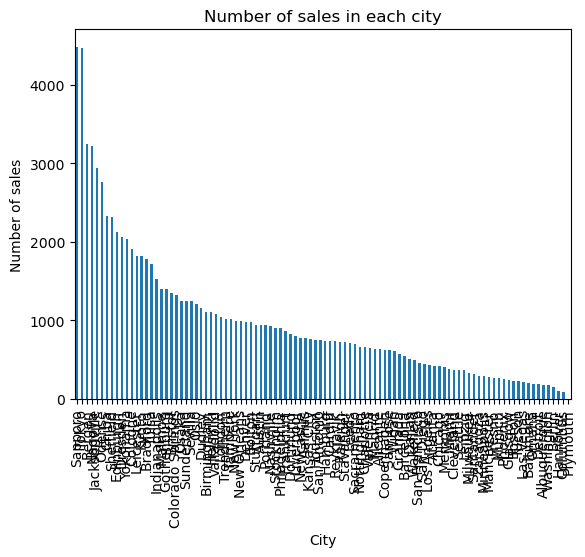

In [33]:
customer_sales_master['City'].value_counts().sort_values(ascending = False).plot(kind='bar')

plt.title('Number of sales in each city')
plt.xlabel('City')
plt.ylabel('Number of sales')

# My first attempt at a bar graph showing the most popular cities, but there are clearly too many to make this
# visualisation of any use.  So I will try to display a particular number of the top cities.

In [34]:
customer_sales_master['City'].sort_index

<bound method Series.sort_index of 0        New York
1        New York
2        New York
3        New York
4        New York
           ...   
97264       Chiba
97265       Chiba
97266       Chiba
97267       Chiba
97268       Chiba
Name: City, Length: 97269, dtype: object>

In [35]:
customer_sales_master['City'].value_counts()

Sapporo         4483
Tokyo           4476
Bergen          3251
Nagoya          3228
Jacksonville    2945
                ... 
Washington       176
Berlin           149
Hannover          97
Columbus          91
Plymouth           1
Name: City, Length: 100, dtype: int64

QUESTION 2: What are the most popular (top 5) cities?

I ended up looking at the top 10 cities becuse I noticed that there was something that stood out to me in this
more focussed look at the data - being that four of the top 10 cities with the most sales were located in Japan.


Text(0, 0.5, 'Number of sales')

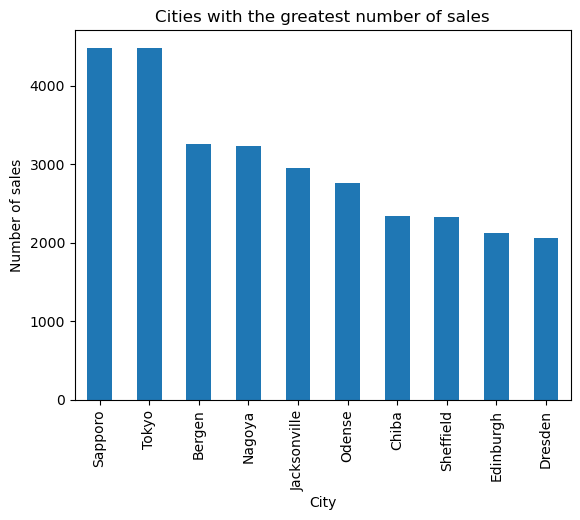

In [36]:
customer_sales_master['City'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')

plt.title('Cities with the greatest number of sales')
plt.xlabel('City')
plt.ylabel('Number of sales')

CITIES WITH THE GREATEST NUMBER OF SALES:
    
This chart shows that four of the top 10 cities with the highest number of sales are located in Japan; Sapporo, Tokyo, Nagoya and Chiba. 


In [37]:
customer_sales_master.head()

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,month,Year
0,3.51,10000453.0,1/12/2012,5.9111,Blue Label Chicken Soup,10019.0,2.16,5.67,1.0,A Superior System,1,New York,USA,1.0,2012.0
1,147.27,10000453.0,1/18/2012,182.4093,Better Canned Tuna in Water,10341.0,27.84,175.11,1.0,A Superior System,1,New York,USA,1.0,2012.0
2,5.75,10000453.0,1/21/2012,17.7832,Golden Frozen Broccoli,10106.0,11.32,17.07,1.0,A Superior System,1,New York,USA,1.0,2012.0
3,41.56,10000453.0,1/21/2012,68.2464,High Top Golden Delcious Apples,10197.0,23.96,65.52,6.0,A Superior System,1,New York,USA,1.0,2012.0
4,110.45,10000453.0,1/21/2012,164.7821,Gorilla Low Fat String Cheese,10671.0,47.74,158.19,1.0,A Superior System,1,New York,USA,1.0,2012.0


QUESTION 3: What are the most popular (top 5) products that sell in Japan (Sapporo, Tokyo, Nagoya and Chiba)?

To answer this question, I created a subset of the data, slicing off information about sales only located within the 
Region of Japan.  

This enabled me to sort the items based upon the highest number of sales and then graph this data.  A bar graph is 
the most visually appealling graph for comparing total amounts in separate categories.

From this data it became clear that the top 5 products that sell in the region of Japan are:

    - High Top Golden Delcious Apples    252 sales
    - Fast Dried Apples                  203 sales
    - Pearl Chardonnay                   194 sales
    - Better Fancy Canned Sardines       188 sales
    - Moms Sliced Turkey                 188 sales

It could also be noted that the top two products are both apple products - reinforcing the popularity of apple product
sales and their success in Japan.

In [38]:
subset1 = customer_sales_master[customer_sales_master["Region"] == 'Japan']
# 19627 rows of information

In [39]:
subset1.head()

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,month,Year
77642,25.12,10000466.0,1/13/2012,129.2478,Pearl Chardonnay,10898.0,98.96,124.08,2.0,A2Z Solutions,94,Tokyo,Japan,1.0,2012.0
77643,91.17,10000466.0,3/3/2012,270.7200,Radius Grits,10637.0,168.72,259.89,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77644,1.87,10000466.0,3/17/2012,11.6978,Moms Corned Beef,10383.0,9.36,11.23,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77645,56.79,10000466.0,3/17/2012,77.2243,High Top Golden Delcious Apples,10197.0,17.34,74.13,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77646,106.08,10000466.0,3/17/2012,231.0588,Tell Tale Firm Tofu,10505.0,115.74,221.82,12.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0


In [40]:
subset1['Item Desc'].value_counts().sort_values(ascending = False).head(10)

High Top Golden Delcious Apples    252
Fast Dried Apples                  203
Pearl Chardonnay                   194
Better Fancy Canned Sardines       188
Moms Sliced Turkey                 188
Tell Tale Firm Tofu                180
Red Spade Beef Bologna             177
Ebony Prepared Salad               172
Discover Spaghetti                 172
Imagine Popsicles                  161
Name: Item Desc, dtype: int64

Text(0, 0.5, 'Number of sales')

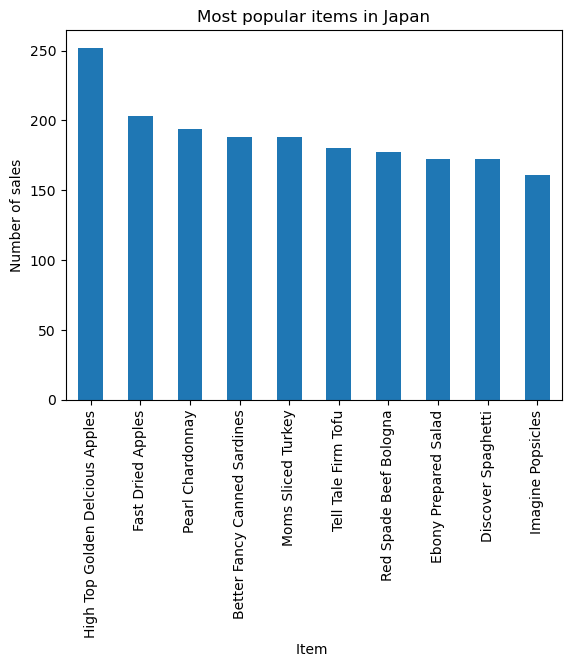

In [41]:
subset1['Item Desc'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')

plt.title('Most popular items in Japan')
plt.xlabel('Item ')
plt.ylabel('Number of sales')

The most popular item in Japan is the 'High Top Golden Delicious Apples'. Interesting to note that the second most popular product in Japan is also an apple product.

In [42]:
# Data showing trend in a particular product sales over time.
subset1[subset1["Item Desc"] == "High Top Golden Delcious Apples"]
#252 rows

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,month,Year
77645,56.79,10000466.0,3/17/2012,77.2243,High Top Golden Delcious Apples,10197.0,17.34,74.13,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77811,13.70,10000466.0,4/23/2014,23.2200,High Top Golden Delcious Apples,10197.0,10.22,23.92,2.0,A2Z Solutions,94,Tokyo,Japan,4.0,2014.0
78254,56.79,10011398.0,2/4/2014,84.7584,High Top Golden Delcious Apples,10197.0,30.51,87.30,1.0,Ethyl Corporation,94,Tokyo,Japan,2.0,2014.0
78475,56.79,10023489.0,1/4/2014,80.5205,High Top Golden Delcious Apples,10197.0,26.15,82.94,1.0,Robust Code,94,Tokyo,Japan,1.0,2014.0
78535,56.79,10023489.0,2/1/2014,80.5205,High Top Golden Delcious Apples,10197.0,26.15,82.94,1.0,Robust Code,94,Tokyo,Japan,2.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97000,20.78,10025037.0,1/11/2014,34.8339,High Top Golden Delcious Apples,10197.0,15.09,35.87,3.0,Tampere,100,Chiba,Japan,1.0,2014.0
97119,27.71,10025037.0,3/22/2014,46.4452,High Top Golden Delcious Apples,10197.0,20.13,47.84,4.0,Tampere,100,Chiba,Japan,3.0,2014.0
97154,56.79,10025037.0,4/12/2014,83.0632,High Top Golden Delcious Apples,10197.0,28.76,85.55,1.0,Tampere,100,Chiba,Japan,4.0,2014.0
97231,20.54,10025037.0,5/27/2014,34.8339,High Top Golden Delcious Apples,10197.0,15.33,35.87,3.0,Tampere,100,Chiba,Japan,5.0,2014.0


/Users/emilygrant/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'High Top Golden Delicious Apples Sales and Margin')

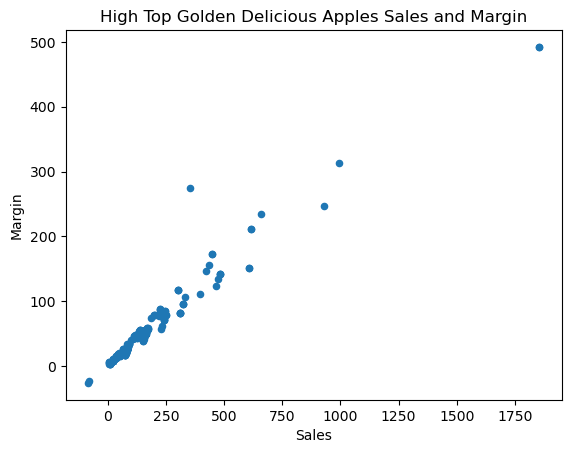

In [43]:
subset1[subset1["Item Desc"] == "High Top Golden Delcious Apples"].plot(kind='scatter', x='Sales', y='Margin', alpha=1)
plt.title('High Top Golden Delicious Apples Sales and Margin')



The above graph tells us that as the sales increased, the margin on the product also increased, though
there is one outlier that perhaps should be excluded from the data.  The extremely high plot point on this scatter plot is distracting from the trend and, although the reason for this outlier is unknown, could be due to exceptional circumstances.

QUESTION 4: What are the trends of sales throughout the year?

I will compare the sales of the top two products over time: High Top Golden Delcious Apples and Fast Dried Apples.  Both being apple products, it will be interesting to see whether there is any pattern or trend relating to apple availability and seasons, and whether the dried apples tend to become more popular when the fresh apples are not in season.

For this I will create a line graph with two separate lines of data, one for each product.  Line graphs are used to show trends over time and including two lines of data will provide a good visual to easily make a comparison.


In [44]:
subset1.head()

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,month,Year
77642,25.12,10000466.0,1/13/2012,129.2478,Pearl Chardonnay,10898.0,98.96,124.08,2.0,A2Z Solutions,94,Tokyo,Japan,1.0,2012.0
77643,91.17,10000466.0,3/3/2012,270.7200,Radius Grits,10637.0,168.72,259.89,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77644,1.87,10000466.0,3/17/2012,11.6978,Moms Corned Beef,10383.0,9.36,11.23,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77645,56.79,10000466.0,3/17/2012,77.2243,High Top Golden Delcious Apples,10197.0,17.34,74.13,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77646,106.08,10000466.0,3/17/2012,231.0588,Tell Tale Firm Tofu,10505.0,115.74,221.82,12.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0


In [45]:
# Created a new subset with only rows in Item Desc categorised as High Top Golden Delcious Apples and Fast Dried 
# Apples

mask = subset1["Item Desc"].isin(["High Top Golden Delcious Apples", "Fast Dried Apples" ])
subset2 = subset1[mask]
print(subset2)

         Cost  Customer Number        Date  GrossSales  \
77645   56.79       10000466.0   3/17/2012     77.2243   
77662    9.96       10000466.0    7/7/2012     23.0702   
77811   13.70       10000466.0   4/23/2014     23.2200   
78231   60.04       10011398.0  11/29/2013     90.9208   
78254   56.79       10011398.0    2/4/2014     84.7584   
...       ...              ...         ...         ...   
97126  111.87       10025037.0   3/22/2014    225.1260   
97154   56.79       10025037.0   4/12/2014     83.0632   
97231   20.54       10025037.0   5/27/2014     34.8339   
97246   24.89       10025037.0    6/3/2014     62.0365   
97265   56.79       10025289.0   11/8/2013     84.7584   

                             Item Desc  Item Number  Margin   Sales  \
77645  High Top Golden Delcious Apples      10197.0   17.34   74.13   
77662                Fast Dried Apples      10554.0   12.19   22.15   
77811  High Top Golden Delcious Apples      10197.0   10.22   23.92   
78231              

In [46]:
subset2.head()

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,month,Year
77645,56.79,10000466.0,3/17/2012,77.2243,High Top Golden Delcious Apples,10197.0,17.34,74.13,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77662,9.96,10000466.0,7/7/2012,23.0702,Fast Dried Apples,10554.0,12.19,22.15,2.0,A2Z Solutions,94,Tokyo,Japan,7.0,2012.0
77811,13.70,10000466.0,4/23/2014,23.2200,High Top Golden Delcious Apples,10197.0,10.22,23.92,2.0,A2Z Solutions,94,Tokyo,Japan,4.0,2014.0
78231,60.04,10011398.0,11/29/2013,90.9208,Fast Dried Apples,10554.0,30.88,90.92,1.0,Ethyl Corporation,94,Tokyo,Japan,11.0,2013.0
78254,56.79,10011398.0,2/4/2014,84.7584,High Top Golden Delcious Apples,10197.0,30.51,87.30,1.0,Ethyl Corporation,94,Tokyo,Japan,2.0,2014.0


In [47]:
# Note that I came back here after having trouble with the date and time for the line graph below, the dates along the
# x axis are appearing out of order.   Rechecking that the Date (Index) datatype is a string, but I did extract the
# year and month into separate columns earlier and they are float datatypes, so I'm going to have another go at 
#plotting using these columns instead of the Date (Index) .
subset2.dtypes

Cost               float64
Customer Number    float64
Date                object
GrossSales         float64
Item Desc           object
Item Number        float64
Margin             float64
Sales              float64
Sales Qty          float64
Customer            object
City Code            int64
City                object
Region              object
month              float64
Year               float64
dtype: object

In [48]:
pd.to_datetime(subset1["Date"])

77642   2012-01-13
77643   2012-03-03
77644   2012-03-17
77645   2012-03-17
77646   2012-03-17
           ...    
97264   2013-11-08
97265   2013-11-08
97266   2012-01-27
97267   2012-04-27
97268   2012-07-27
Name: Date, Length: 19627, dtype: datetime64[ns]

In [49]:
subset2.head()

,Cost,Customer Number,Date,GrossSales,Item Desc,Item Number,Margin,Sales,Sales Qty,Customer,City Code,City,Region,month,Year
77645,56.79,10000466.0,3/17/2012,77.2243,High Top Golden Delcious Apples,10197.0,17.34,74.13,1.0,A2Z Solutions,94,Tokyo,Japan,3.0,2012.0
77662,9.96,10000466.0,7/7/2012,23.0702,Fast Dried Apples,10554.0,12.19,22.15,2.0,A2Z Solutions,94,Tokyo,Japan,7.0,2012.0
77811,13.70,10000466.0,4/23/2014,23.2200,High Top Golden Delcious Apples,10197.0,10.22,23.92,2.0,A2Z Solutions,94,Tokyo,Japan,4.0,2014.0
78231,60.04,10011398.0,11/29/2013,90.9208,Fast Dried Apples,10554.0,30.88,90.92,1.0,Ethyl Corporation,94,Tokyo,Japan,11.0,2013.0
78254,56.79,10011398.0,2/4/2014,84.7584,High Top Golden Delcious Apples,10197.0,30.51,87.30,1.0,Ethyl Corporation,94,Tokyo,Japan,2.0,2014.0


<Axes: >

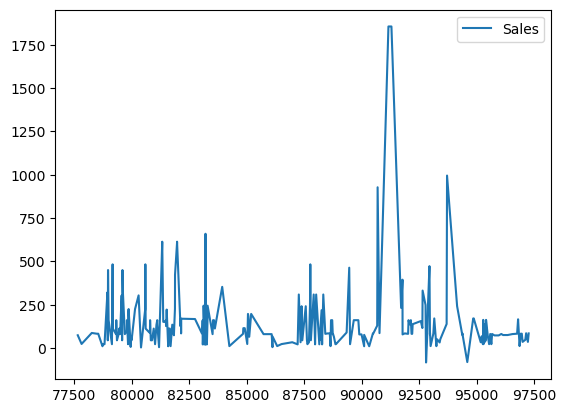

In [50]:
# Having a go at creating a line graph for one of the top two product sales over time - though I want to have the 
# x axis as the date and the y axis as the sales.
subset2[subset2["Item Desc"] == "High Top Golden Delcious Apples"].sort_index(ascending = False).plot(kind="line", y='Sales')



Text(0, 0.5, 'Number of sales')

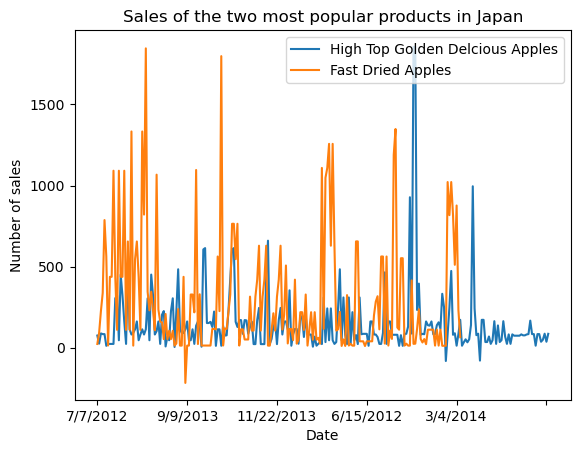

In [51]:
subset_ht = subset2[subset2["Item Desc"] == "High Top Golden Delcious Apples"].sort_index()
subset_fd = subset2[subset2["Item Desc"] == "Fast Dried Apples"].sort_index()
ax = subset_ht.plot(kind="line", x="Date", y='Sales', label='High Top Golden Delcious Apples')
subset_fd.plot(kind="line", x="Date",y='Sales', ax=ax, label='Fast Dried Apples')

plt.title('Sales of the two most popular products in Japan')
plt.ylabel('Number of sales')

The above graph "Sales of the two most popular products in Japan" demonstrates distinct spikes and slumps in the sales of these two products (Fast Dried Apples and High Top Golden Delcious Apples) over time.  

I hypothesised that the reason for the top two products being a fresh and dried version of the same thing is becuase apples are a popular product and when High Top Golden Delcious Apples are not in season, Fast Dried Apples are more popular. As evidenced in this data, the Fast Dried Apples experience more sales when the High Top Golden Delcious Apples are not available, and there is a sudden drop in Fast Dried Apples when the High Top Golden Delcious Apples suddenly do become available.

Also to be noted is that the Fast Dried Apples sales have been increasing in recent years. This could be due to harvest quality and climate impacts on the High Top Golden Delcious Apples.

Based upon this information, I would recommend planning and preparing for fluctuations in apple sales. It appears that, even though the sales fluctuate, these fluctuations happen in regular patterns and can be used to predict when you need to make the Fast Dried Apples more available ensuring there are always an alternative option when the High Top Golden Delcious Apples are not in season.